In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from faraway.datasets import galapagos

In [2]:
# Load the galapagos dataset
data = galapagos.load()

In [3]:
data.head()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


In [6]:
data.info

<bound method DataFrame.info of               Species     Area  Elevation  Nearest  Scruz  Adjacent
Baltra             58    25.09        346      0.6    0.6      1.84
Bartolome          31     1.24        109      0.6   26.3    572.33
Caldwell            3     0.21        114      2.8   58.7      0.78
Champion           25     0.10         46      1.9   47.4      0.18
Coamano             2     0.05         77      1.9    1.9    903.82
Daphne.Major       18     0.34        119      8.0    8.0      1.84
Daphne.Minor       24     0.08         93      6.0   12.0      0.34
Darwin             10     2.33        168     34.1  290.2      2.85
Eden                8     0.03         71      0.4    0.4     17.95
Enderby             2     0.18        112      2.6   50.2      0.10
Espanola           97    58.27        198      1.1   88.3      0.57
Fernandina         93   634.49       1494      4.3   95.3   4669.32
Gardner1           58     0.57         49      1.1   93.1     58.27
Gardner2        

In [7]:
data.describe()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,85.233333,261.708667,368.033333,10.060000,56.976667,261.098333
std,114.633053,864.110519,421.604937,14.274636,68.032334,864.518967
min,2.000000,0.010000,25.000000,0.200000,0.000000,0.030000
25%,13.000000,0.257500,97.750000,0.800000,11.025000,0.520000
50%,42.000000,2.590000,192.000000,3.050000,46.650000,2.590000
75%,96.000000,59.237500,435.250000,10.025000,81.075000,59.237500
max,444.000000,4669.320000,1707.000000,47.400000,290.200000,4669.320000


### Fit Cuadratic Model

The relationship between elevation and species count may be nonlinear. A quadratic term is added to improve the fit.

To be honest, they don't have an idea why. I would do it with an scatter plot (parabola)

They say this BS: The quadratic term helps model curvature, which is common in ecological studies where optimal conditions (e.g., mid-range elevations) influence species counts.

In [8]:
# Add a quadratic term for Elevation
data['Elevation2'] = data['Elevation'] ** 2

In [9]:
# Fit the model
quad_model = smf.ols(formula='Species ~ Elevation + Elevation2', data=data).fit()

In [10]:
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     23.56
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.20e-06
Time:                        10:28:33   Log-Likelihood:                -169.16
No. Observations:                  30   AIC:                             344.3
Df Residuals:                      27   BIC:                             348.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.9712     23.433     -1.236      0.227     -77.051      19.109
Elevation      0.4488      0.101      4.447      0.000       0.242       0.656
Elevation2    -0.0002   6.41e-05     -2.588      0.015      -0.000   -3.44e-05
==============================================================================
Omnibus:                        6.418   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.843
Skew:                           0.380   Prob(JB):                       0.0327
Kurtosis:                       5.213   Cond. No.                     1.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Terms

Explore the combined effect of Area and Elevation on Species using interaction terms.

In [14]:
# Fit the model with interaction terms
# how the effect of Area on Species changes depending on Elevation, and vice versa
interaction_model = smf.ols(formula='Species ~ Area * Elevation', data=data).fit()

In [15]:
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     60.01
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           8.09e-12
Time:                        12:08:15   Log-Likelihood:                -153.26
No. Observations:                  30   AIC:                             314.5
Df Residuals:                      26   BIC:                             320.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.7666     11.374      2.002      0.056      -0.612      46.146
Area               0.7660      0.093      8.226      0.000       0.575       0.957
Elevation          0.0344      0.033      1.028      0.314      -0.034       0.103
Area:Elevation    -0.0004   5.13e-05     -8.117      0.000      -0.001      -0.000
==============================================================================
Omnibus:                       24.162   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.473
Skew:                           1.684   Prob(JB):                     1.81e-11
Kurtosis:                       8.313   Cond. No.                     2.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Area is a strong predictor, but its effect depends on Elevation — interaction is significant and negative.

### Add indicator variable - Binary

Indicator variables are used to split islands into near and far groups based on the Nearest variable.

In [16]:
# Create binary `Near_Far` indicator variable
median_nearest = data['Nearest'].median()
data['Near_Far'] = np.where(data['Nearest'] > median_nearest, 1, 0)

In [18]:
data.tail()

,Species,Area,Elevation,Nearest,Scruz,Adjacent,Elevation2,Near_Far
SantaFe,62,24.08,259,16.5,16.5,0.52,67081,1
SantaMaria,285,170.92,640,2.6,49.2,0.10,409600,0
Seymour,44,1.84,147,0.6,9.6,25.09,21609,0
Tortuga,16,1.24,186,6.8,50.9,17.95,34596,1
Wolf,21,2.85,253,34.1,254.7,2.33,64009,1


In [19]:
# Fit the model
indicator_model = smf.ols(formula='Species ~ Area + Elevation + Near_Far', data=data).fit()

In [20]:
indicator_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     12.85
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           2.43e-05
Time:                        12:30:06   Log-Likelihood:                -170.67
No. Observations:                  30   AIC:                             349.3
Df Residuals:                      26   BIC:                             354.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4508     23.658      1.583      0.126     -11.179      86.081
Area           0.0054      0.026      0.206      0.838      -0.049       0.060
Elevation      0.1928      0.053      3.636      0.001       0.084       0.302
Near_Far     -49.1756     29.444     -1.670      0.107    -109.698      11.347
==============================================================================
Omnibus:                       13.804   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.859
Skew:                           0.997   Prob(JB):                     4.87e-05
Kurtosis:                       6.451   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

✅ Elevation is the strongest predictor. As elevation increases, Species tends to increase significantly.

⚠️ Near_Far has a large negative coefficient (−49), meaning that being in a "Far" location (above median Nearest) is associated with much lower species count — but the p-value (0.107) is just above the 0.05 threshold.

❌ Area is not helping the model (p = 0.838), likely just noise here.

### Transformation Log

In [21]:
# Apply logarithmic transformation to Area
data['log_Area'] = np.log(data['Area'])

# Fit the log-transformed model
log_model = smf.ols(formula='Species ~ log_Area + Elevation + Near_Far', data=data).fit()

In [22]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     20.97
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           4.08e-07
Time:                        12:36:48   Log-Likelihood:                -165.87
No. Observations:                  30   AIC:                             339.7
Df Residuals:                      26   BIC:                             345.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.4465     20.983      2.738      0.011      14.315     100.578
log_Area      18.9688      6.037      3.142      0.004       6.559      31.379
Elevation      0.0726      0.050      1.450      0.159      -0.030       0.176
Near_Far     -56.8120     23.976     -2.370      0.026    -106.095      -7.529
==============================================================================
Omnibus:                       10.221   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.247
Skew:                           0.915   Prob(JB):                      0.00596
Kurtosis:                       5.201   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

| Predictor     | Coef   | p-value | Interpretation                                                                                       |
| ------------- | ------ | ------- | ---------------------------------------------------------------------------------------------------- |
| **Intercept** | 57.45  | 0.011   | Expected Species when all X = 0 (not very interpretable directly)                                    |
| **log\_Area** | 18.97  | 0.004   | **Statistically significant**: A 1-unit increase in log(Area) is associated with +18.97 in `Species` |
| **Elevation** | 0.0726 | 0.159   | Not significant anymore                                                                              |
| **Near\_Far** | -56.81 | 0.026   | Significant: Far locations have \~57 fewer species than near ones, on average                        |


### Residual Plot

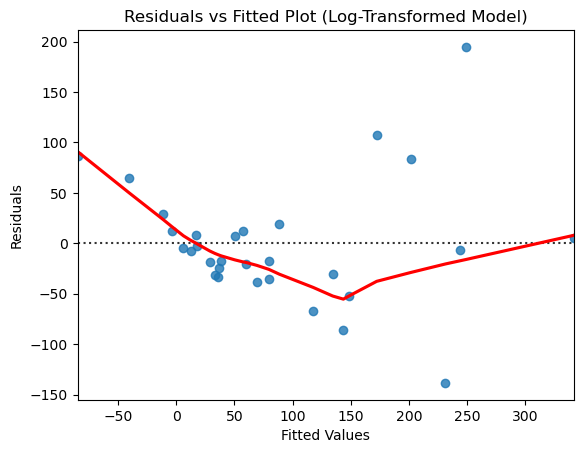

In [24]:
# Residuals vs Fitted plot
sns.residplot(x=log_model.fittedvalues, y=log_model.resid, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot (Log-Transformed Model)")
plt.show()

### Normality of Residuals

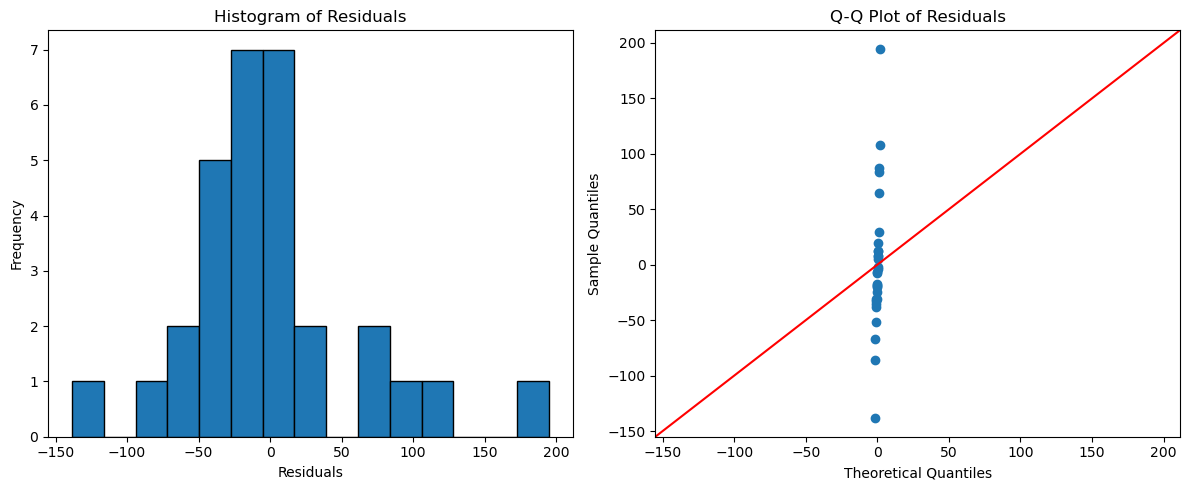

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed


# Histogram of residuals
axes[0].hist(log_model.resid, bins=15, edgecolor='k')
axes[0].set_title("Histogram of Residuals")
axes[0].set_xlabel("Residuals")
axes[0].set_ylabel("Frequency")


# Q-Q plot
sm.qqplot(log_model.resid, line='45', ax=axes[1])  # Specify ax for Q-Q plot
axes[1].set_title("Q-Q Plot of Residuals")


# Adjust layout
plt.tight_layout()


# Show the plots
plt.show()

### Multicollinearity Check

Correlation Matrix:
           log_Area  Elevation  Near_Far
log_Area   1.000000   0.816824  0.049677
Elevation  0.816824   1.000000  0.006514
Near_Far   0.049677   0.006514  1.000000


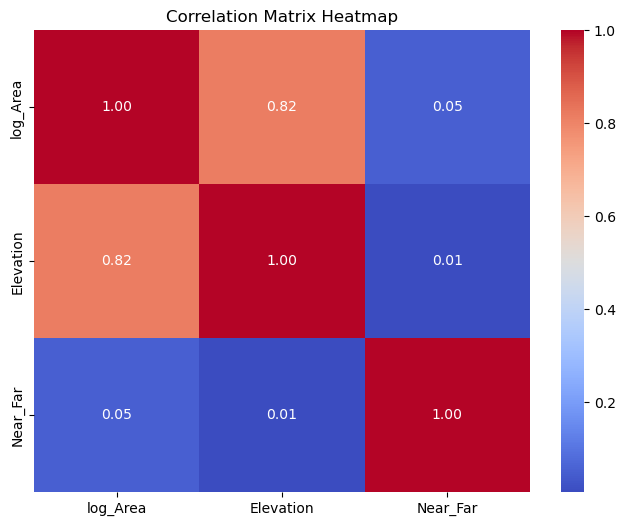


VIF:
    Variable       VIF
0      const  3.082088
1   log_Area  3.022692
2  Elevation  3.015360
3   Near_Far  1.005990


In [27]:
# Correlation Matrix and Heatmap
correlation_matrix = data[['log_Area', 'Elevation', 'Near_Far']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


# VIF Calculation and Heatmap
X = data[['log_Area', 'Elevation', 'Near_Far']]
X = sm.add_constant(X)


vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF:")
print(vif)

### Model Comparisson

In [28]:
# Compare models using Adjusted R-squared


#Collect Adjusted R-squared values
model_comparison = {
   'Model': ['Quadratic', 'Interaction', 'Indicator', 'Log-Transformed'],
   'Adjusted R-squared': [quad_model.rsquared_adj,
                          interaction_model.rsquared_adj,
                          indicator_model.rsquared_adj,
                          log_model.rsquared_adj]
}


# Create a DataFrame and sort by Adjusted R-squared
model_comparison_df = pd.DataFrame(model_comparison)
model_comparison_df = model_comparison_df.sort_values(by='Adjusted R-squared', ascending=False)


# Display the table
print("Model Performance Comparison (Adjusted R-squared):")
print(model_comparison_df.to_string(index=False))

Model Performance Comparison (Adjusted R-squared):
          Model  Adjusted R-squared
    Interaction            0.859248
Log-Transformed            0.673869
      Quadratic            0.608728
      Indicator            0.550779
